# Working with AMG8833 on Arduino

Date: 2023/09/01

Reference: https://github.com/araobp/arduino-infrared-array-sensor

In [28]:
import serial
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Fetching a frame from AMG8833 -- this is like taking a picture.

In [145]:
# Fetch one frame from AMG8833 via USB serial
ser = serial.Serial('COM4', 115200)  # Windows COM Port

try:
    l = ser.readline().decode('ascii').rstrip('\r\n')
    data = l.split(',')
except:
    print('Error')

ser.close()

In [146]:
# Change the data into 8x8 matrix and flip the order
data = np.array(data).reshape(8,8).astype(np.uint8)
data = np.flip(data, axis=0)

## Show the frame

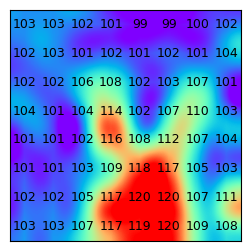

In [147]:
fig, ax = plt.subplots(figsize=(3,3))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(data, interpolation='sinc', cmap='rainbow')
# Reference: https://stackoverflow.com/questions/67409569/display-an-image-with-pixel-values-shown-numerically
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, str(data[i, j]), color='black', ha='center', va='center', fontsize=9)
# plt.savefig('me.jpg')